In [111]:
import pandas as pd
from icecream import ic
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [112]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [113]:
# ic(train.info())

In [114]:
ob_col = ['TypeofContact', 'Occupation',
            'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
train.replace('Fe Male', 'Female')
# ic(train['Gender'])

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


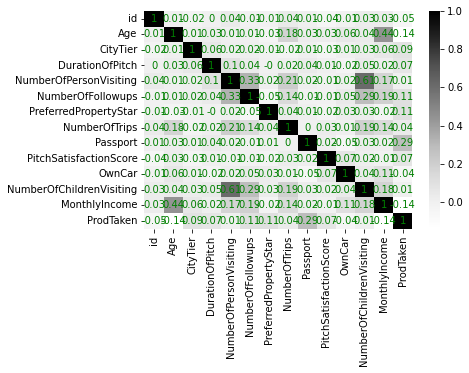

In [115]:
corr_df = train.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
pd.set_option('display.max_columns',None)
# ic(corr_df)
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
# plt.savefig('corr.png')

In [116]:
drop_col = ['NumberOfPersonVisiting','NumberOfChildrenVisiting', 'id', 'NumberOfTrips','NumberOfFollowups', 'OwnCar', 'MonthlyIncome'] 

In [117]:
train = train.drop(columns=drop_col)
test = test.drop(columns=drop_col)

In [118]:
ic(train)

ic| train:        Age    TypeofContact  CityTier  DurationOfPitch      Occupation  \
           0     28.0  Company Invited         1             10.0  Small Business   
           1     34.0     Self Enquiry         3              NaN  Small Business   
           2     45.0  Company Invited         1              NaN        Salaried   
           3     29.0  Company Invited         1              7.0  Small Business   
           4     42.0     Self Enquiry         3              6.0        Salaried   
           ...    ...              ...       ...              ...             ...   
           1950  28.0     Self Enquiry         1             10.0  Small Business   
           1951  41.0     Self Enquiry         3              8.0        Salaried   
           1952  38.0  Company Invited         3             28.0  Small Business   
           1953  28.0     Self Enquiry         3             30.0  Small Business   
           1954  22.0  Company Invited         1              9.0

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,ProdTaken
0,28.0,Company Invited,1,10.0,Small Business,Male,Basic,3.0,Married,0,1,Executive,0
1,34.0,Self Enquiry,3,NaN,Small Business,Female,Deluxe,4.0,Single,1,5,Manager,1
2,45.0,Company Invited,1,NaN,Salaried,Male,Deluxe,4.0,Married,0,4,Manager,0
3,29.0,Company Invited,1,7.0,Small Business,Male,Basic,4.0,Married,0,4,Executive,1
4,42.0,Self Enquiry,3,6.0,Salaried,Male,Deluxe,3.0,Divorced,0,3,Manager,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,28.0,Self Enquiry,1,10.0,Small Business,Male,Basic,3.0,Single,0,1,Executive,0
1951,41.0,Self Enquiry,3,8.0,Salaried,Female,Super Deluxe,5.0,Divorced,0,5,AVP,0
1952,38.0,Company Invited,3,28.0,Small Business,Female,Basic,3.0,Divorced,0,2,Executive,0
1953,28.0,Self Enquiry,3,30.0,Small Business,Female,Deluxe,3.0,Married,0,1,Manager,0


In [119]:
q1=train['DurationOfPitch'].quantile(0.25)
q2=train['DurationOfPitch'].quantile(0.5)
q3=train['DurationOfPitch'].quantile(0.75)
iqr=q3-q1
print(iqr)

11.0


In [120]:
condition=train['DurationOfPitch']>q3+1.5*iqr
condition2=train['DurationOfPitch']>q3+1.5*iqr
ic(train[condition])
ic(train[condition2])

ic| train[condition]: Empty DataFrame
                      Columns: [Age, TypeofContact, CityTier, DurationOfPitch, Occupation, Gender, ProductPitched, PreferredPropertyStar, MaritalStatus, Passport, PitchSatisfactionScore, Designation, ProdTaken]
                      Index: []
ic| train[condition2]: Empty DataFrame
                       Columns: [Age, TypeofContact, CityTier, DurationOfPitch, Occupation, Gender, ProductPitched, PreferredPropertyStar, MaritalStatus, Passport, PitchSatisfactionScore, Designation, ProdTaken]
                       Index: []


,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,ProdTaken


In [121]:
aq1=train['Age'].quantile(0.25)
aq2=train['Age'].quantile(0.5)
aq3=train['Age'].quantile(0.75)
iqr2=aq3-aq1
print(iqr2)

12.0


In [122]:
condition3=train['Age']>aq3+1.5*iqr2
ic(train[condition2])

ic| train[condition2]: Empty DataFrame
                       Columns: [Age, TypeofContact, CityTier, DurationOfPitch, Occupation, Gender, ProductPitched, PreferredPropertyStar, MaritalStatus, Passport, PitchSatisfactionScore, Designation, ProdTaken]
                       Index: []


,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,ProdTaken


In [123]:
# for col, dtype in train.dtypes.items():
#     if dtype == 'object':
#         # 문자형 칼럼의 경우 'Unknown'을 채워줍니다.
#         value = 'Unknown'
#         train.loc[:,col] = train[col].fillna(value)
#         test.loc[:,col] = test[col].fillna(value)
#     elif dtype == int or dtype == float:
#         # 수치형 칼럼의 경우 0을 채워줍니다.
#         value = 0
#         train.loc[:,col] = train[col].fillna(value)
#         test.loc[:,col] = test[col].fillna(value)
# # print(train.isna().sum())

In [124]:
# train.dropna(inplace=True)
# test.dropna(inplace=True)

# # 결과를 확인합니다.
# train.isna().sum()
# test.isna().sum()

In [125]:
# pandas의 fillna 메소드를 활용하여 NAN 값을 채워니다.
# 0 으로 채우는 경우
train.DurationOfPitch = train.DurationOfPitch.fillna(0)
test.DurationOfPitch = test.DurationOfPitch.fillna(0)
# train.NumberOfFollowups = train.NumberOfFollowups.fillna(0)
# test.NumberOfFollowups = test.NumberOfFollowups.fillna(0)

# train.MonthlyIncome = train.MonthlyIncome.fillna(0)
# test.MonthlyIncome = test.MonthlyIncome.fillna(0)

# mean 값으로 채우는 경우
mean_cols = ['Age', 'PreferredPropertyStar']
for col in mean_cols:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(train[col].mean())

# "Unknown"으로 채우는 경우
train.TypeofContact = train.TypeofContact.fillna("Unknown")
test.TypeofContact = test.TypeofContact.fillna("Unknown")

# 결과를 확인합니다.
train.isna().sum()
test.isna().sum()

Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
Passport                  0
PitchSatisfactionScore    0
Designation               0
dtype: int64

In [126]:
encoder = LabelEncoder()
encoder.fit(train['TypeofContact'])
encoder.transform(train['TypeofContact'])

for col in ob_col:
    encoder = LabelEncoder()
    encoder.fit(train[col])
    train[col] = encoder.transform(train[col])
    test[col] = encoder.transform(test[col])
# ic(train)
# ic(test)

In [127]:
# print(train)
# print(test)

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(train[['Age', 'DurationOfPitch', 'PreferredPropertyStar']])

# train[['Age', 'DurationOfPitch']] = scaler.transform(train[['Age', 'DurationOfPitch']])
# test[['Age', 'DurationOfPitch']] = scaler.transform(test[['Age', 'DurationOfPitch']])

train[['Age', 'DurationOfPitch', 'PreferredPropertyStar']] = scaler.transform(train[['Age', 'DurationOfPitch', 'PreferredPropertyStar']])
test[['Age', 'DurationOfPitch', 'PreferredPropertyStar']] = scaler.transform(test[['Age', 'DurationOfPitch', 'PreferredPropertyStar']])
# ic(train)
# test

In [129]:
x = train.drop(columns=['ProdTaken'])
y = train['ProdTaken']

# ic(x)
# ic(y)

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

In [131]:
# from sklearn.svm import SVC

model = RandomForestClassifier(n_estimators=250, max_depth=15, random_state=42)

model.fit(x_train,y_train)
val_predict = model.predict(x_val) 
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_val, val_predict))

정확도 : 0.9028132992327366


In [132]:
# model.fit(x,y)
# pred = model.predict(test)
# print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
# print(pred[:10])

# result = model.score(test, pred)
# ic('model.score:', result) 

# sample_submission['ProdTaken'] = pred
# ic(sample_submission.head())
# sample_submission.to_csv('submission/submission_sc3.csv',index = False)